# Homework 03

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [4]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [5]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [6]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [7]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [10]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [11]:
y = data['sex']

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [13]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [14]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [15]:
le.fit( data['sex'] )

LabelEncoder()

In [16]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [17]:
model = LogisticRegression()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import roc_curve

In [21]:
predictions = model.predict_proba(X_test)

In [22]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])
fpr, tpr

(array([0.        , 0.        , 0.        , ..., 0.98820446, 0.98951507,
        1.        ]),
 array([0.00000000e+00, 5.77367206e-04, 5.77367206e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]))

In [23]:
from matplotlib import pyplot as plt

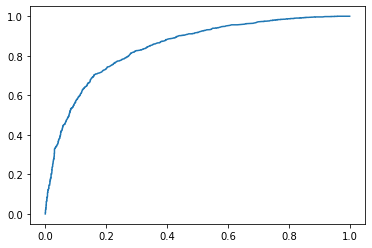

In [24]:
plt.plot( fpr, tpr )

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
roc_auc_score(y_test, predictions[:, 1])

0.8439235695973413

In [27]:
## -----------------------------------------------------------------------
## -----------------------------------------------------------------------
## -----------------------------------------------------------------------

In [28]:
## -----------------------------------------------------------------------
#
# Homework
#
# Let's check tpr and fpr 
#

In [29]:
predictions = model.predict_proba(X_test)
predictions, y_test

(array([[0.66833719, 0.33166281],
        [0.10737603, 0.89262397],
        [0.97053579, 0.02946421],
        ...,
        [0.04385756, 0.95614244],
        [0.88072112, 0.11927888],
        [0.53451889, 0.46548111]]),
 7791     0
 9933     1
 6372     0
 10157    0
 9819     1
         ..
 7633     1
 6538     0
 3452     1
 718      0
 4004     1
 Length: 3258, dtype: int64)

In [30]:
# compare by rows: last value in predicts (index 1) and y_test
def get_values(cutoff=0.5):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for predict_value, test_value in zip(predictions[:, 1], y_test):
        predict = int(predict_value >= cutoff)
        if predict == 1:
            if test_value == 1:
                tp += 1
            else:
                fp += 1

        else:
            if test_value == 1:
                fn += 1
            else:
                tn += 1
    return tp,fp,fn,tn

tp,fp,fn,tn = get_values()

# view results as matrix
print('         act +  ', 'act -')
print('pred +   ', tp,'  ',fp)
print('pred -   ', fn,'  ',tn)

         act +   act -
pred +    1362    397
pred -    370    1129


In [31]:
# True positive rate:
tpr = tp / (tp + fn)

# False positive rate:
fpr = fp / (tn + fp)

print(f'TPR: {tpr}, FPR: {fpr}')

TPR: 0.7863741339491916, FPR: 0.2601572739187418


In [32]:
# Accuracy
acc = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuracy (handmade): {acc}')

# Precision
precision = tp / (tp + fp)
print(f'Precision (handmade): {precision}')

# Recall
recall = tp / (tp + fn)
print(f'Recall (handmade): {recall}')

Accuracy (handmade): 0.7645794966236955
Precision (handmade): 0.7743035815804434
Recall (handmade): 0.7863741339491916


In [33]:
# Let's compare and check
#

from sklearn.metrics import precision_score, recall_score
pred_for_lib = model.predict(X_test)

print(f'Precision (lib): {precision_score(y_test, pred_for_lib)}')
print(f'Recall (lib): {recall_score(y_test, pred_for_lib)}')

Precision (lib): 0.7743035815804434
Recall (lib): 0.7863741339491916


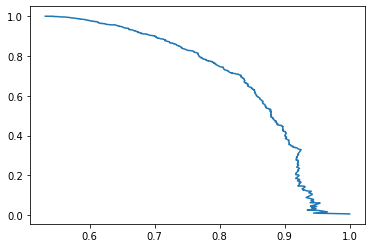

In [34]:
# - - - - - - - - - - - - - -  - - - - --  -- - -  -
#
# Draw handmade plots Precision / Recall
#

pr_data = []
re_data = []

for step in range(0, 1000):
    cutoff = round(step * 0.001, 3)
    tp,fp,fn,tn = get_values(cutoff)
    pr_data.append(tp / (tp + fp))
    re_data.append(tp / (tp + fn))

plt.plot(pr_data, re_data)

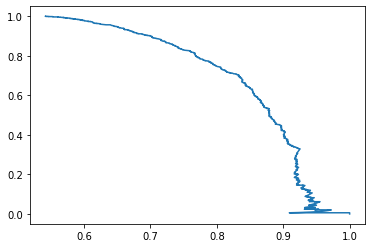

In [35]:
# Draw lib plots Precision / Recall

from sklearn.metrics import precision_recall_curve
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])
plt.plot(pr,re)

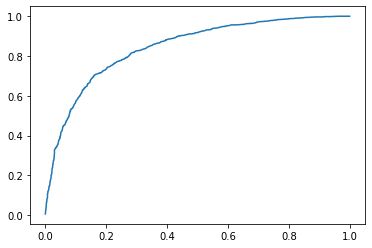

In [36]:
# ------------------------------------
# Draw handmade ROC plot
#

fpr_data = []
tpr_data = []

for step in range(0, 1000):
    cutoff = round(step * 0.001, 3)
    tp,fp,fn,tn = get_values(cutoff)
    tpr_data.append(tp / (tp + fn))
    fpr_data.append(fp / (tn + fp))

plt.plot(fpr_data, tpr_data)

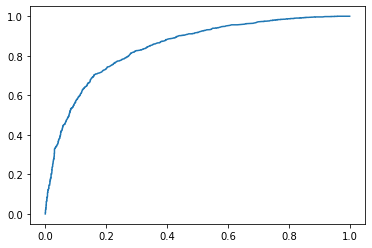

In [37]:
# Draw lib ROC plot

from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])
plt.plot(fpr, tpr)